In [1]:
#Datetime functions
from datetime import datetime

#numeric tools
import pandas as pd
import numpy as np

#for text editing
import re
import os, string
from string import digits

# natural language kit tool
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# if first time
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.stem.snowball import EnglishStemmer as ES

#plotting biblio
import matplotlib.pyplot as plt
%matplotlib inline

# network analysis
import networkx as nx

# Textblob for sentiment analysis
from textblob import TextBlob

#load csv file (dataframe)
df = pd.read_csv("trump_tweets_all.csv")
#print(df)

# Parse time
parse_time = lambda x: datetime.strptime(x, "%m-%d-%Y %H:%M:%S")
z = df.created_at
df.created_at = [parse_time(d) for d in z]
print(df.created_at)
#filter out punctuation, digits and special characters..
#alle Sonderzeichen durch Leerzeichen erstzt
#alle Groß - durch Kleinbuchstaben
delete_table = str.maketrans(string.punctuation + string.ascii_uppercase,
" " * len(string.punctuation) + string.ascii_lowercase)

#print(delete_table)
#translation table
digits_table = str.maketrans('', '', digits)

# remove common words and tokenize
set(stopwords.words('english'))
stope = stopwords.words("english")

#Unicode replacement for
# - Left double quotation mark: u"\u201c"
# - Right double quotation mark: u"\u201d"

#stoplist extended:
stope.extend(["n't", u"\u201c", u"\u201d", '"','" ', '" ', '""', '"said', "n't", "n't", 'u', 'us', 'rt', 'et', 'al', 'per','realdonaldtrump', 'new', 'schiff', 'would', 'want' 'cent', 'one', 'co', 'may', 'it', 'get', 'also', 'co', 'https', 'pm', 'am', 'amp', 'u s', 'let', 'all', 'who', 'much', 'many', 'say', 'they´r', 'they' 'and', 'with', 'for', 'the', 'this', 'that', 'you', 'so', 'it', 'just', 'a'])

#Clean up quotes
#text_cleaned = [[word.strip('"') for word in text] for text in df["text"]]
#print(text_cleaned)


#texts are cleaned (characters only), filtered (stopwords removed) and stemmed (reduced to word stem)
texts = [[ES().stem(word.translate(delete_table)) for word in tweet.lower().split()
            if word.translate(delete_table) not in stope] for tweet in df["text"]]

#Prepare texts for sentiment analysis (characters only), filtered (stopwords removed) and stemmed (reduced to word stem)
sentiment_texts = [[word.translate(digits_table) for word in tweet] for tweet in texts]
sentiment_texts = [" ".join(tweet) for tweet in texts]

#print(sentiment_texts[:200])
#print(texts[:200])

### TODO ###
# Filter out links ("https://xyz.com")
# Filter out Retweets
# Filter out "'", '"' single or double quote tokens
# Why replace y with i ?
# Why deleting e's ?
# Filter out unicode Emojis!?


0       2019-10-30 20:42:43
1       2019-10-30 20:21:54
2       2019-10-30 19:54:02
3       2019-10-30 19:49:44
4       2019-10-30 18:44:32
                ...        
14343   2016-01-01 05:18:23
14344   2016-01-01 03:25:27
14345   2016-01-01 00:44:14
14346   2015-12-31 23:21:49
14347   2015-12-31 23:11:35
Name: created_at, Length: 14348, dtype: datetime64[ns]


In [2]:
# Sentiment analysis
#testblob = TextBlob(sentiment_texts[1])
#print(testblob.polarity)

analysis = [TextBlob(tweet).polarity for tweet in sentiment_texts]
#print(analysis)

df["sentiment_polarity"] = analysis

df

,source,text,created_at,retweet_count,favorite_count,id_str,sentiment_polarity
0,Twitter Media Studio,The Democrats have been on this path for 3 yea...,2019-10-30 20:42:43,20062,63830,1189643818431406080,0.250000
1,Twitter for iPhone,Thank you @GLFOP! https://t.co/IpoUY7QPM2,2019-10-30 20:21:54,11113,38294,1189638577866657794,0.000000
2,Twitter for iPhone,“Adam Schiff’s drive to impeach Trump based on...,2019-10-30 19:54:02,18913,61417,1189631565279760391,-0.800000
3,Twitter for iPhone,We will be having a big rally for Governor @Ma...,2019-10-30 19:49:44,13014,42063,1189630486886395906,0.000000
4,Twitter for iPhone,Early voting in Louisiana for a man who will b...,2019-10-30 18:44:32,15636,55783,1189614076743376897,0.161111
...,...,...,...,...,...,...,...
14343,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,2016-01-01 05:18:23,3434,9143,682792967736848385,0.000000
14344,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/Y...,2016-01-01 03:25:27,3460,8581,682764544402440192,0.000000
14345,Twitter for Android,I will be on @FoxNews live with members of my...,2016-01-01 00:44:14,2108,6735,682723973449289728,0.468182
14346,Twitter for Android,I would like to wish everyone A HAPPY AND HEAL...,2015-12-31 23:21:49,6776,16495,682703233492619264,0.433333


0.0


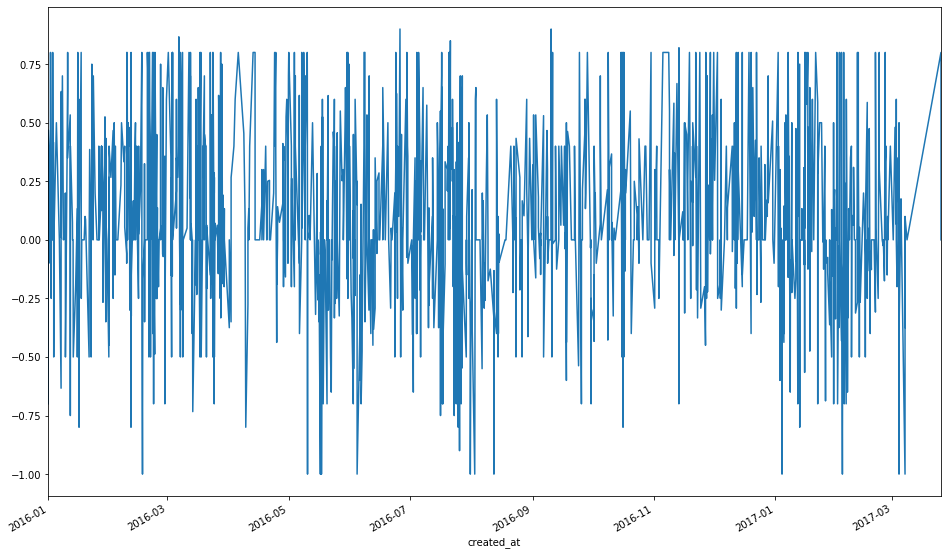

In [29]:
df_android = df[df.source == "Twitter for Android"]
df_android
df_android.set_index("created_at")["sentiment_polarity"].plot(figsize=(16,10))
print(df_android["sentiment_polarity"].median())



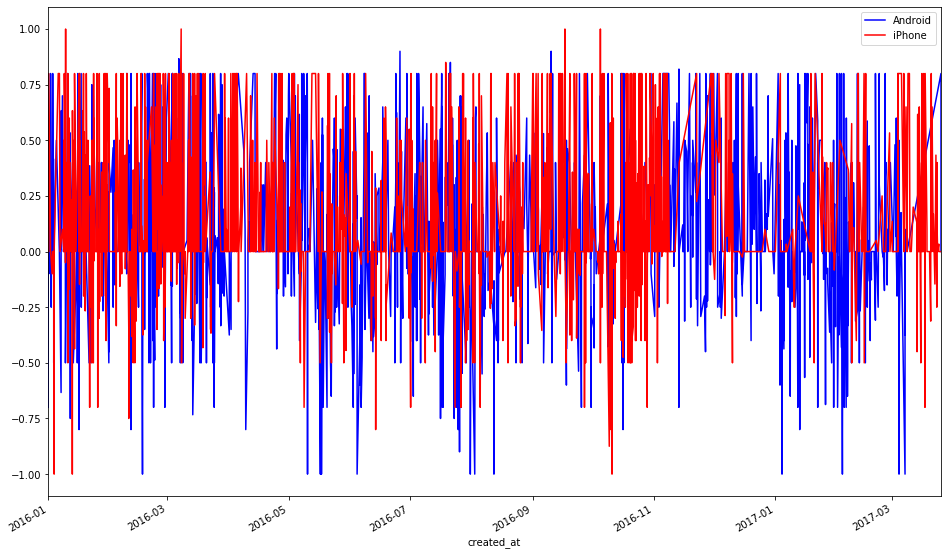

In [37]:

df_iphone = df[(df.source == "Twitter for iPhone") & (df.created_at < "2017-03-25 14:41:14")]
df_iphone

#df[datetime(df.created_at) < datetime("03-25-2017 14:41:14")]
#df_iphone_trump = [parse_time(df.created_at) < date_end]
#def parse_time(datetime) = datetime.strptime(datetime, "%m-%d-%Y %H:%M:
#parse_time = lambda x: datetime.strptime(x, "%m-%d-%Y %H:%M:%S")                                              
#date_end = parse_time("03-25-2017 14:41:14")
#df_iphone_trump = [parse_time(d) < date_end for d in df.created_at]
#datetime("2017-03-25 14:41:14", )

#df_iphone_trump = df_iphone_all[df_iphone_all.created_at < "2017-03-25 14:41:14"]

#df_iphone_trump.sentiment_polarity

#df_iphone.set_index("created_at")["sentiment_polarity"].plot(figsize=(16,10))

# gca stands for 'get current axis'
ax = plt.gca()

df_android.plot(kind='line',x='created_at',y='sentiment_polarity', color="blue", ax=ax, figsize=(16,10), label="Android")
df_iphone.plot(kind='line',x='created_at',y='sentiment_polarity', color='red', ax=ax, figsize=(16,10), label="iPhone")

plt.show()

                    source                                               text  \
0     Twitter Media Studio  The Democrats have been on this path for 3 yea...   
96    Twitter Media Studio  Thank you to @MarthaRaddatz and @TerryMoran fo...   
288   Twitter Media Studio                            https://t.co/oSn6amjZo4   
379   Twitter Media Studio  REPUBLICANS MUST STICK TOGETHER AND FIGHT! htt...   
428   Twitter Media Studio  Years of BAD GOVERNMENT such a sorry thing to ...   
...                    ...                                                ...   
6511  Twitter Media Studio                            https://t.co/mNkDYgu5sr   
6512  Twitter Media Studio                            https://t.co/MadlgNheSe   
6513  Twitter Media Studio                            https://t.co/CMxxW2fEDq   
6514  Twitter Media Studio                            https://t.co/afqHydsMB5   
7615  Twitter Media Studio  Today I was thrilled to join student leaders f...   

              created_at  r

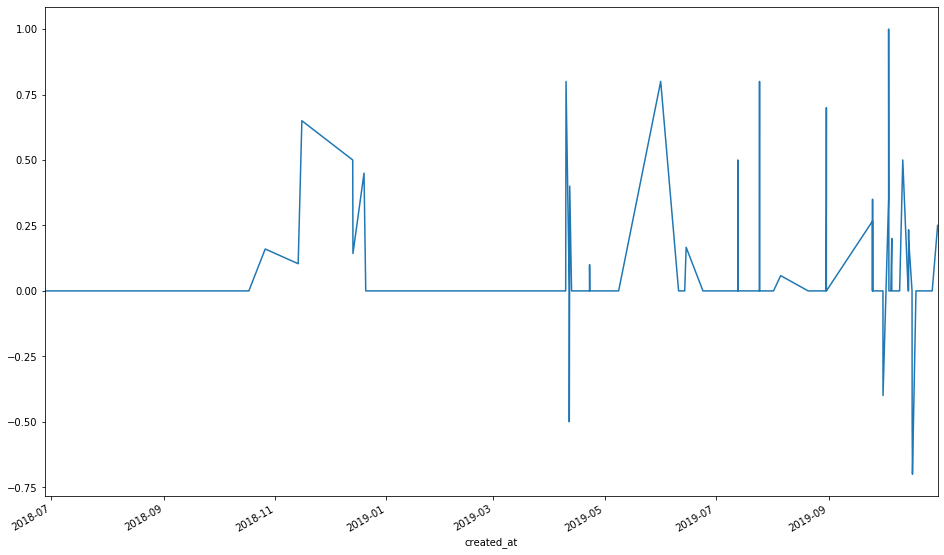

In [47]:
df_mediastudio = df[df.source == "Twitter Media Studio"]
print(df_mediastudio)
df_mediastudio.set_index("created_at")["sentiment_polarity"].plot(figsize=(16,10))

In [58]:
# Count most negative tweets (Polarity <= -0.5)

treshold = -0.5
neg_android = [t for t in df_android.sentiment_polarity if t  <= treshold]
print("Number of Android tweets with polarity <= " + str(treshold) + " : ", len(neg_android))
neg_iphone = [t for t in df_iphone.sentiment_polarity if t  <= treshold]
print("Number of iPhone tweets with polarity <= " + str(treshold) + " : ", len(neg_iphone))
neg_mediastudio = [t for t in df_mediastudio.sentiment_polarity if t  <= treshold]
print("Number of Media Studio tweets with polarity <= " + str(treshold) + " : ", len(neg_mediastudio))
print("------------------------------------------------------------")
# (Number_most_neg_tweets / Number_total_tweets) = quote
print("Quote Android: ", len(neg_android) / len(df_android))
print("Quote iPhone", len(neg_iphone) / len(df_iphone))
print("Quote Media Studio", len(neg_mediastudio) / len(df_mediastudio))

Number of Android tweets with polarity <= -0.5 :  104
Number of iPhone tweets with polarity <= -0.5 :  50
Number of Media Studio tweets with polarity <= -0.5 :  3
------------------------------------------------------------
Quote Android:  0.0670535138620245
Quote iPhone 0.025329280648429583
Quote Media Studio 0.025210084033613446


In [6]:
#texts = filter(lambda c: not c.isdigit(), texts)
#print(texts)

# without stopwords exclusion
#texts = [[word.translate(delete_table) for word in document.lower().split()] for document in documents]
# print(texts)


# flatten texts (in case they should be in the form of lists within lists) 
flattened_texts = [val for sublist in texts for val in sublist]
# use the digits_table from above to remove digits
flattened_texts = [word.translate(digits_table) for word in flattened_texts]

# alter texts from list to words
texts = (" ".join(flattened_texts))
#texts = texts.translate({ord('"'): None})
#print(texts)



# alter texts from words to tokens and on to nltk.Text
tokens = nltk.word_tokenize(texts)
texts = nltk.Text(tokens) # number of words in texts
print(len(texts))
#texts = [word for word in texts if word not in "\"'"]
#print(texts[1500:2300])

233620


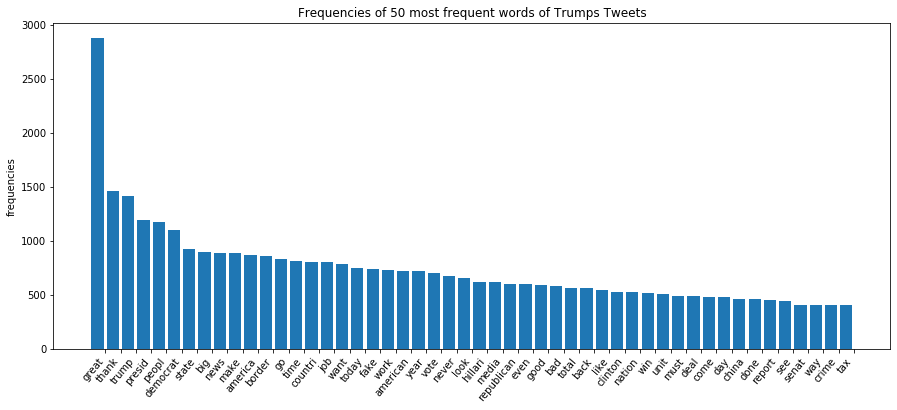

In [7]:
# most frequent words and their frequencies = frequency distribution
fdist = nltk.FreqDist(texts)

# transform into tuples (word, frequency)
tuples = zip([x for x in fdist],[y for y in fdist.values()])

sorted_tuples = sorted(tuples, key=lambda x: x[1], reverse = True) #sort 
#print(len(sorted_tuples))

# save sorted_tuples to file
#f = open( 'C:\\...\\sorted_tuples', 'w' )
#f.write( repr(sorted_tuples))
#f.close()

# exclude stopwords
w = [x[0] for x in sorted_tuples if x[0] not in stope]
fr = [x[1] for x in sorted_tuples if x[0] not in stope]
von = 0
bis = 50
numwords = bis - von
most_freq_words = w[von:bis]
frequencies = fr[von:bis]

# plot frequency distribution
fig = plt.figure(figsize=(15, 6))
x = range(numwords)
plt.bar(x, frequencies)
# set ticks position 0.5 to the right, so that labels are centered
xticks_pos = np.arange(0.5, numwords + 0.5, 1)
# specify a rotation for the tick labels in degrees or with keywords (e.g.'vertical');
#ha = horizontal alignment of ticklabels
plt.xticks(xticks_pos, most_freq_words, rotation='50', ha = 'right')
#plt.title('Frequencies of %s to %s most frequent words in %s' %(von, bis, datei))
plt.title('Frequencies of %s most frequent words of Trumps Tweets' %(numwords))
plt.ylabel('frequencies')
# Plot margins so that markers don't get clipped by the axes
plt.margins(0.05)
# Tweak spacing to prevent clipping of tick-labels; can also be done with figsize
#plt.subplots_adjust(bottom = 0.5)
plt.show()

In [8]:
from __future__ import division

# how many times does word x appear
def appearance(word):
    return texts.count(word)

print(appearance('whistleblower'))
#print(appearance('energy'))

def percentage(count, total):
    return (100 * count / total)

# what percentage of the text does word x take up
print(percentage(texts.count('great'), len(texts)))
print(percentage(texts.count('china'), len(texts)))

23
1.2314870302200154
0.19775704134919955


In [9]:
# consider context -1 and 1 (= adjacents) and loop through most frequent words to show how their context is interconnected

def determine_adjacents(word, k):
    # finding the words that surround the concordanced word in distance dis
    c = nltk.ConcordanceIndex(texts.tokens, key = lambda s: s.lower())
    # the words around the concordanced word, -1 = before, + 1 = after the word
    b = [texts.tokens[offset - k] for offset in c.offsets(word)]
    a = [texts.tokens[offset + k] for offset in c.offsets(word)]
    #print(a)

    # remove duplicates and stopwords
    b_cleared = []
    for x in b:
        if x not in b_cleared and x not in stope:
            b_cleared.append(x)

    a_cleared = []
    for x in a:
        if x not in a_cleared and x not in stope:
            a_cleared.append(x)

    # count number of occurrences of contextwords in a, b
    b_occurrences = [b.count(item) for item in b_cleared]
    a_occurrences = [a.count(item) for item in a_cleared]

    # append distance indicators -1 and +1 and number of occurrences
    j = 0
    before = []
    after = []
    i = 0
    for item in b_cleared:
        before.append((item, -k, b_occurrences[i]))
        i += 1
    j = 0
    for item in a_cleared:
        after.append((item, +k, a_occurrences[j]))
        j += 1
    j += 1

    # take maximum
    sorted_before = sorted(before,key = lambda x: x[2], reverse = True)
    max_before = sorted_before[0]
    sorted_after = sorted(after,key = lambda x: x[2], reverse = True)
    max_after = sorted_after[0]
    max_adjacent = (max_before + max_after)
    dict_adjacent = {word: max_adjacent}
    return dict_adjacent

# word = the concordanced word
# k = the number of occurences considered
max_adjacents = []
for item in most_freq_words:
    try:
        max_adjacents.append(determine_adjacents(item, 1))
    except:
        stope.append(item)
        continue

print(max_adjacents)

[{'great': ('america', -1, 348, 'job', 1, 163)}, {'thank': ('want', -1, 16, 'great', 1, 44)}, {'trump': ('presid', -1, 207, 'campaign', 1, 66)}, {'presid': ('whitehouse', -1, 34, 'trump', 1, 207)}, {'peopl': ('great', -1, 73, 'want', 1, 26)}, {'democrat': ('angri', -1, 44, 'want', 1, 54)}, {'state': ('unit', -1, 336, 'america', 1, 21)}, {'big': ('make', -1, 24, 'crowd', 1, 41)}, {'news': ('fake', -1, 585, 'media', 1, 189)}, {'make': ('togeth', -1, 40, 'america', 1, 360)}, {'america': ('make', -1, 360, 'great', 1, 348)}, {'border': ('southern', -1, 143, 'secur', 1, 100)}, {'go': ('r', -1, 21, 'back', 1, 30)}, {'time': ('york', -1, 71, 'high', 1, 16)}, {'countri': ('great', -1, 28, 'great', 1, 29)}, {'job': ('great', -1, 163, 'job', 1, 38)}, {'want': ('democrat', -1, 54, 'open', 1, 28)}, {'today': ('vote', -1, 22, 'great', 1, 40)}, {'fake': ('despit', -1, 12, 'news', 1, 585)}, {'work': ('hard', -1, 30, 'hard', 1, 146)}, {'american': ('african', -1, 48, 'peopl', 1, 62)}, {'year': ('two', 

In [10]:
#define nodelist and edgelist
n =[(list(x.keys())[0], list(x.values())[0][0], list(x.values())[0][3]) for x in max_adjacents]
# flatten
nl = [item for sublist in n for item in sublist]
# remove duplicates
nodelist = []
for item in nl:
    if item not in nodelist:
        nodelist.append(item)
print (nodelist)

e = [((list(x.keys())[0], list(x.values())[0][0], list(x.values())[0][1], list(x.values
())[0][2]),
    (list(x.keys())[0], list(x.values())[0][3], list(x.values())[0][4], list(x.values
())[0][5])) for x in max_adjacents]
# flatten
edgelist = [item for sublist in e for item in sublist]
#print (edgelist)

['great', 'america', 'job', 'thank', 'want', 'trump', 'presid', 'campaign', 'whitehouse', 'peopl', 'democrat', 'angri', 'state', 'unit', 'big', 'make', 'crowd', 'news', 'fake', 'media', 'togeth', 'border', 'southern', 'secur', 'go', 'r', 'back', 'time', 'york', 'high', 'countri', 'open', 'today', 'vote', 'despit', 'work', 'hard', 'american', 'african', 'year', 'two', 'ago', 'republican', 'never', 'like', 'happen', 'look', 'forward', 'hillari', 'crook', 'clinton', 'parti', 'even', 'though', 'good', 'total', 'complet', 'endorsement', 'come', 'home', 'nation', 'win', 'must', 'congress', 'end', 'deal', 'trade', 'made', 'day', 'china', 'xi', 'done', 'report', 'mueller', 'see', 'soon', 'senat', 'intellig', 'way', 'rate', 'crime', 'strong', 'tax', 'massiv', 'cut']


C:\Users\flori\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\flori\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\flori\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


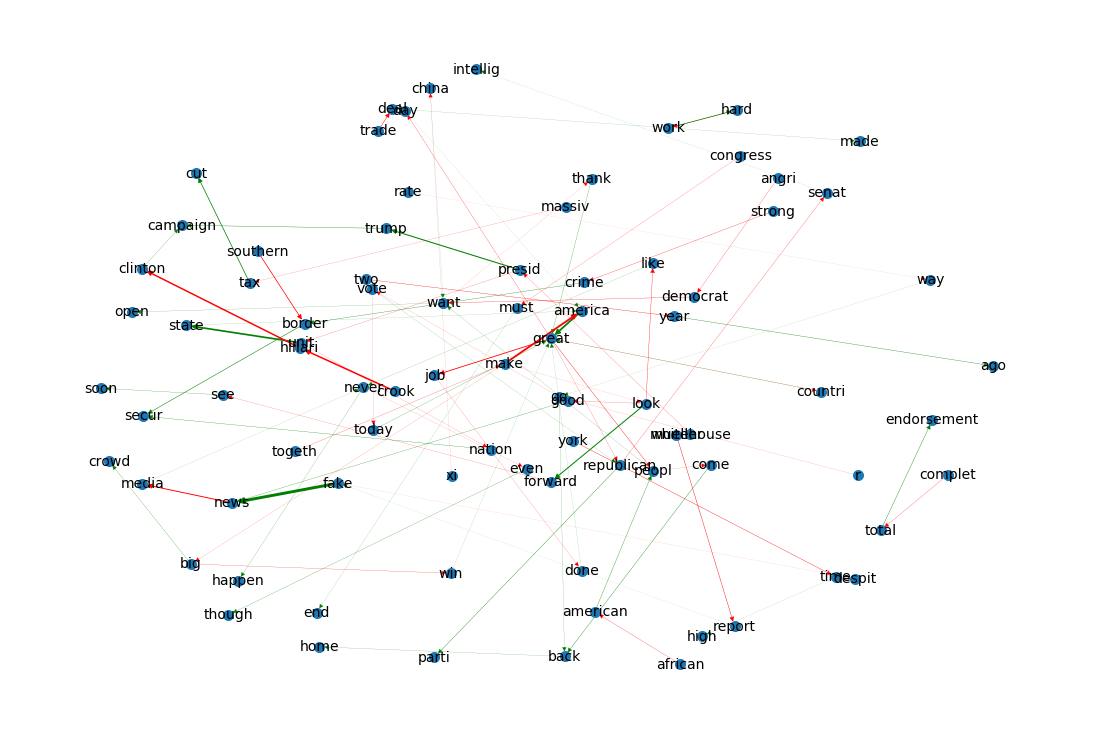

In [11]:
# draw network
import networkx as nx
import matplotlib.colors as colors
import matplotlib.cm as cmx

G = nx.DiGraph()

# nodes
G.add_nodes_from(nodelist)

# edges
#G.add_edges_from(edgelist)

reduce_factor = 200.
for item in edgelist:
    if item[2] == -1:
        # reverse direction in this case, because it is the antecedent word
        G.add_edge(item[1],item[0],color = 'r', weight = item[3]/reduce_factor)
    else:
        G.add_edge(item[0],item[1],color = 'g', weight = item[3]/reduce_factor)

edges = G.edges()
#print(edges)
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

#layout
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k = 0.1 and iterations = 50
pos = nx.spring_layout(G, k = 0.3, iterations = 50) # positions for all nodes

plt.figure(figsize = (15,10))
nx.draw(G, pos, edges = edges, edge_color = colors, width = weights, arrows=True, with_labels=True,
        font_size=14, node_size = 100, alpha = 1)

plt.axis('off')
plt.show() # display

#import pandas as pd
#M = pd.DataFrame(nx.adjacency_matrix(G, nodelist=nodelist))
#M.index = nodelist
#M.columns = nodelist
#M

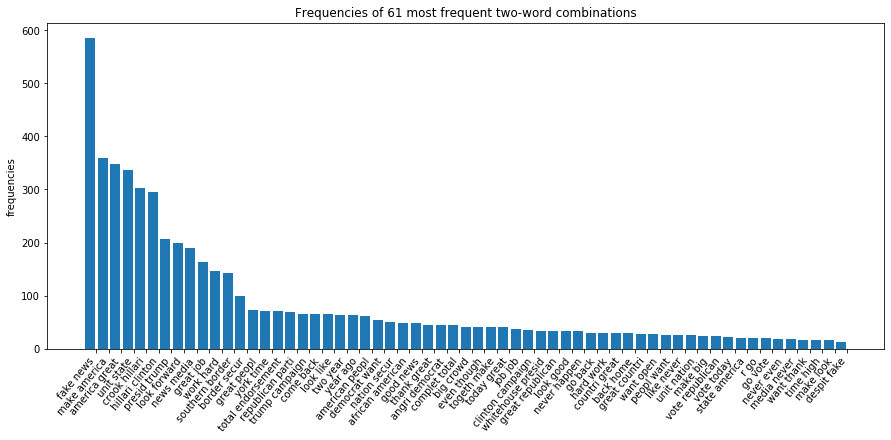

In [12]:
import pandas as pd
connection_list = []

for item in edgelist[:70]:
    if item[2]== -1:
        if [item[1],item[0],item[3]] not in connection_list:
            connection_list.append([item[1],item[0],item[3]])
    else:
        if [item[0],item[1],item[3]] not in connection_list:
            connection_list.append([item[0],item[1],item[3]])

#print(connection_list)
# sort
sorted_cl = sorted(connection_list,key=lambda x: x[2], reverse = True)

words = [(x[0] + " " + x[1]) for x in sorted_cl]
frequences = [x[2] for x in sorted_cl]

# plot
fig = plt.figure(figsize=(15, 6))
numwords = len(sorted_cl)
xcor = range(numwords)
plt.bar(xcor, frequences)
# set ticks position 0.5 to the right, so that labels are centered
xticks_pos = np.arange(0.5, numwords + 0.5, 1)
# specify a rotation for the tick labels in degrees or with keywords (e.g.'vertical'); ha = horizontal alignment of ticklabels
plt.xticks(xticks_pos, words, rotation='50', ha = 'right')
plt.title('Frequencies of %s most frequent two-word combinations' %numwords)
plt.ylabel('frequencies')
# Plot margins so that markers don't get clipped by the axes
plt.margins(0.05)
# Tweak spacing to prevent clipping of tick-labels; can also be done with figsize
#plt.subplots_adjust(bottom = 0.5)
plt.show()

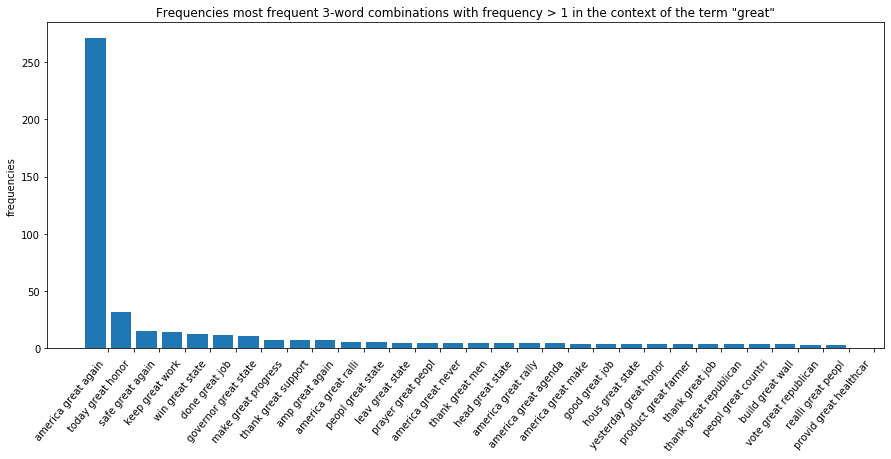

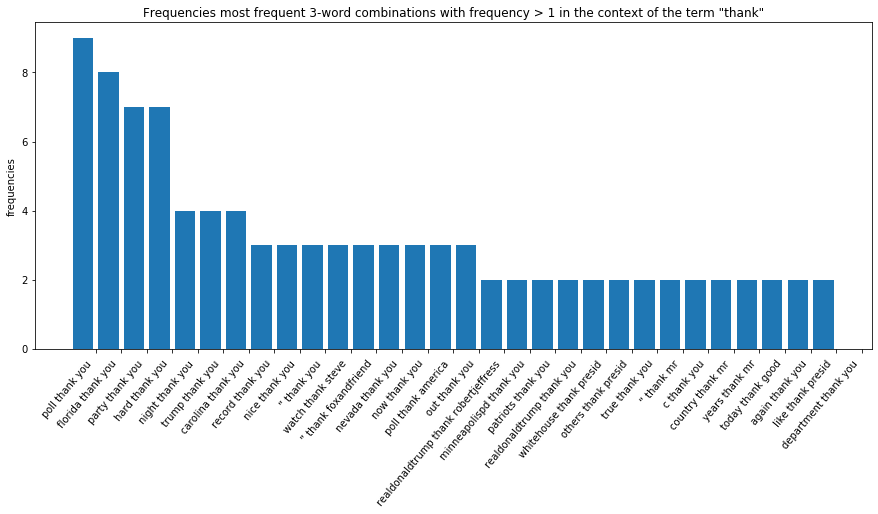

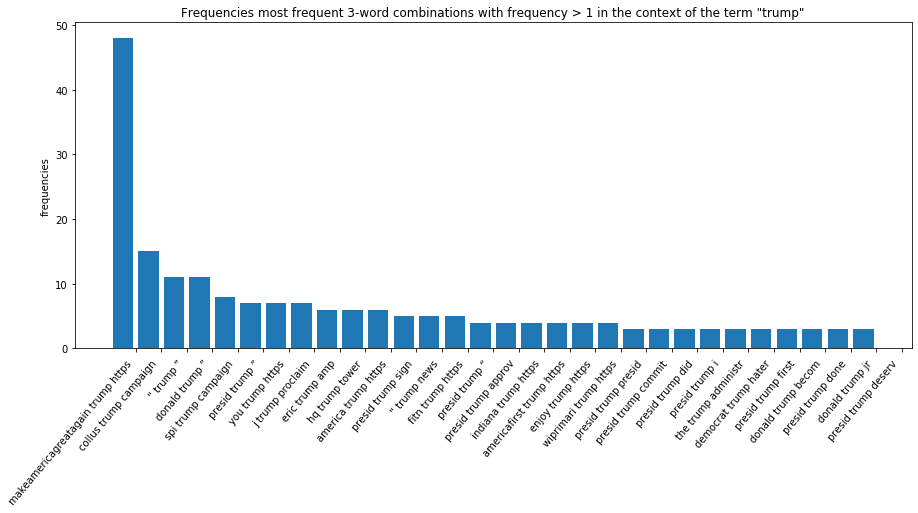

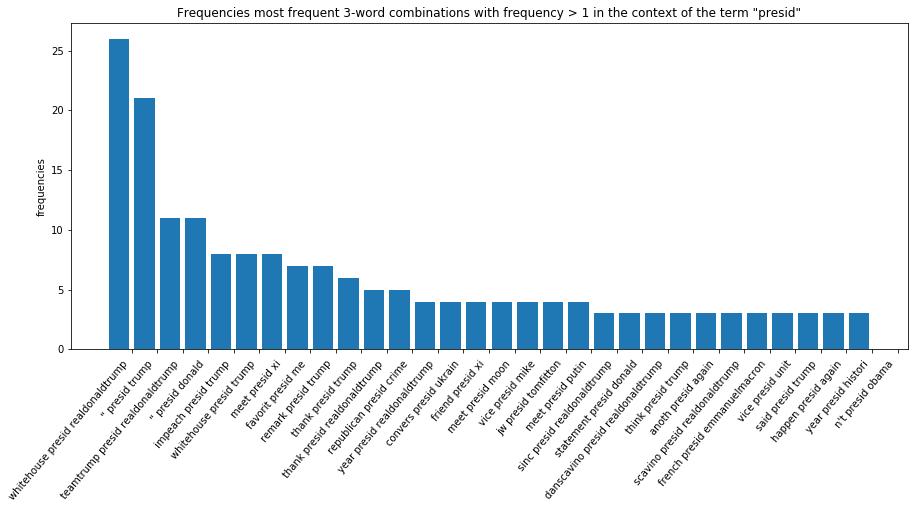

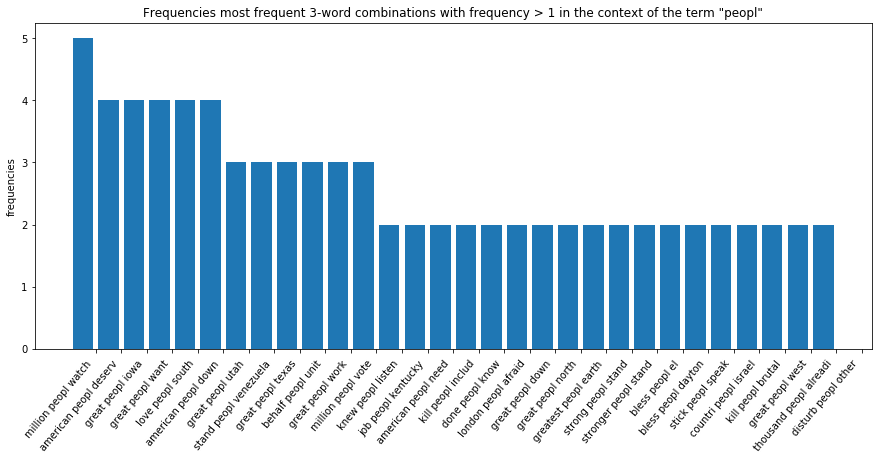

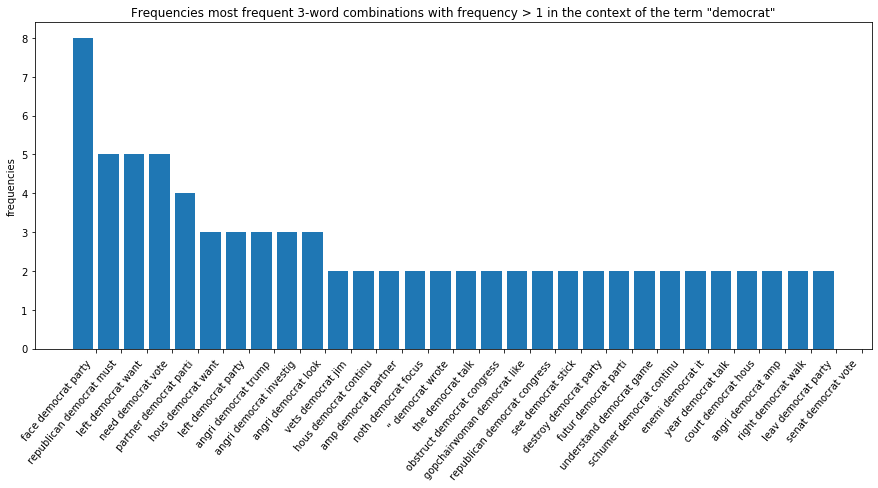

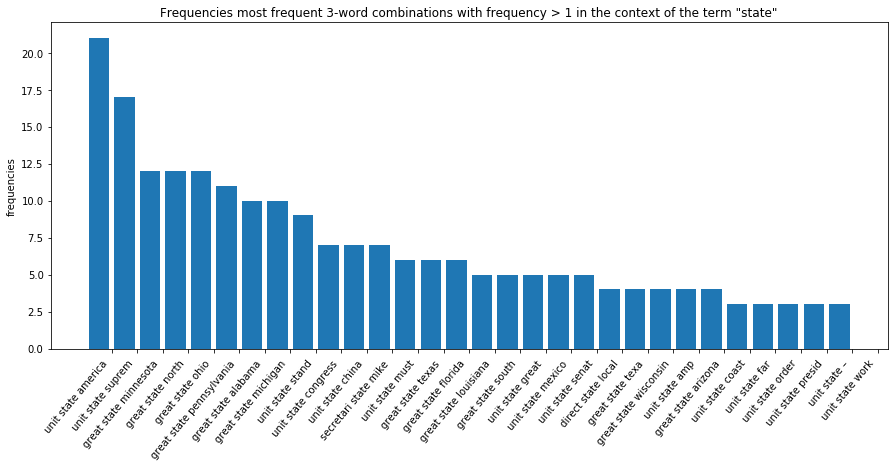

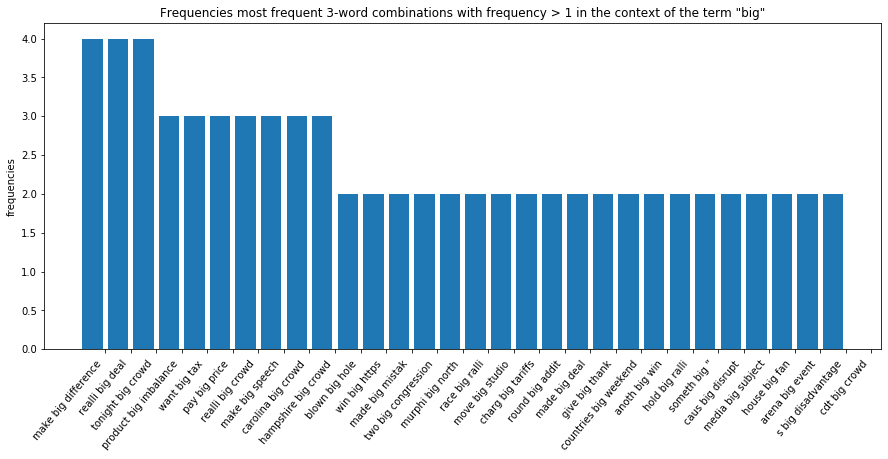

In [13]:
# find frequencies of x most frequent n-word combinations in context of ward x

# word = the concordanced word
# von = the lower end of the context considered
# bis = the (excluded) upper end of the context considered
# k = the number of occurences considered

def context(word, von, bis, k):
    # finding the words that surround the concordanced word in distance dis
    c = nltk.ConcordanceIndex(texts.tokens, key = lambda s: s.lower())
    # +1 indicates the words around the concordanced word, from negcontext (incl) to poscontext (excl)
    negcontext = von # inclusive
    poscontext = bis # exclusive
    d = [texts.tokens[offset + negcontext : offset + poscontext] for offset in c.offsets(word)]
    #print(d)

    dd = []
    for x in d:
        i = 0
        xx = ""
        while i < len(x):
            xx += x[i] + " "
            i += 1
        dd.append(xx)

    # count number of occurrences of contextwords-distance-tuples in dd
    occurrences = [dd.count(item) for item in dd]
    # generate tuples of word-distance-tuples and the number of their occurrences in dd
    tuples = zip(dd, occurrences)

    # remove duplicates in tuples
    cleared = []
    for item in tuples:
        if item not in cleared:
            cleared.append(item)

    # sort tuples by occurrences
    sorted_c = sorted(cleared,key=lambda x: x[1], reverse = True)
    context_words = [x[0] for x in sorted_c if x[1] > k]
    frequences = [x[1] for x in sorted_c if x[1] > k]

    # plot
    fig = plt.figure(figsize=(15, 6))
    numwords = len(context_words)
    xcor = range(numwords)
    plt.bar(xcor[:30], frequences[:30])
    # set ticks position 0.5 to the right, so that labels are centered
    xticks_pos = np.arange(0.5, numwords+0.5, 1)
    # specify a rotation for the tick labels in degrees or with keywords (e.g.'vertical'); ha = horizontal alignment of ticklabels
    plt.xticks(xticks_pos, context_words, rotation='50', ha = 'right')
    plt.title('Frequencies most frequent %s-word combinations with frequency > %s in the context of the term "%s"' %(bis - von, k, word))
    plt.ylabel('frequencies')
    # Plot margins so that markers don't get clipped by the axes
    plt.margins(0.05)
    
    # Tweak spacing to prevent clipping of tick-labels; can also be done with figsize
    #plt.subplots_adjust(bottom = 0.5)
    plt.show()

    
for item in most_freq_words[0:8]:
    # def context(word, von, bis, k):
    context(item, -1, 2, 1)

In [14]:
# draw network without weights, just connections among context-words
def context(word, von, bis, k):
    # finding the words that surround the concordanced word in distance dis
    c = nltk.ConcordanceIndex(texts.tokens, key = lambda s: s.lower())
    # +1 indicates the words around the concordanced word, from negcontext (incl) to poscontext (excl)

    negcontext = von # inclusive
    poscontext = bis # exclusive
    d = [texts.tokens[offset + negcontext : offset + poscontext] for offset in c.offsets(word)]
    
    #print d

    dd = []
    for x in d:
        i = 0
        xx = ""
        while i < len(x):
            xx += x[i] + " "
            i += 1
        dd.append(xx)

    #dd = [(x[0] + " " + x[1] + " " + x[2]) for x in d]
    #print dd

    # count number of occurrences of contextwords-distance-tuples in dd
    occurrences = [dd.count(item) for item in dd]
    # generate tuples of word-distance-tuples and the number of their occurrences in dd
    tuples = zip(dd, occurrences)

    #print tuples

    # remove duplicates in tuples
    cleared = []
    for item in tuples:
        if item not in cleared:
            cleared.append(item)

    #print cleared

    # sort tuples by occurrences
    sorted_c = sorted(cleared,key=lambda x: x[1], reverse = True)
    #print sorted_c

    context_words = [x[0] for x in sorted_c if x[1] > k]
    #print context_words
    frequences = [x[1] for x in sorted_c if x[1] > k]
    #print frequences
    return context_words

c =[]

nodelist = []
edgelist = []

def network_context(contexted_term, k, kk):
    global nodelist
    global edgelist
    nodelist.append(contexted_term)
    # consider triples with frequency more than k
    
    # context(word, von, bis, k)
    cont = context(contexted_term, -1, 2, k)
    # consider kk context triples
    for item in cont[:kk]:
        tokens = nltk.word_tokenize(item)
        for tok in tokens:
            if tok not in nodelist:
                nodelist.append(tok)
                edgelist.append((contexted_term, tok))

k = 3 # minimum frequency
kk = 2 # number of contexts considered

for item in most_freq_words:
    network_context(item, k, kk)
for item in nodelist[:100]:
    network_context(item, k, kk)
print(len(nodelist))
#print(edgelist)

302


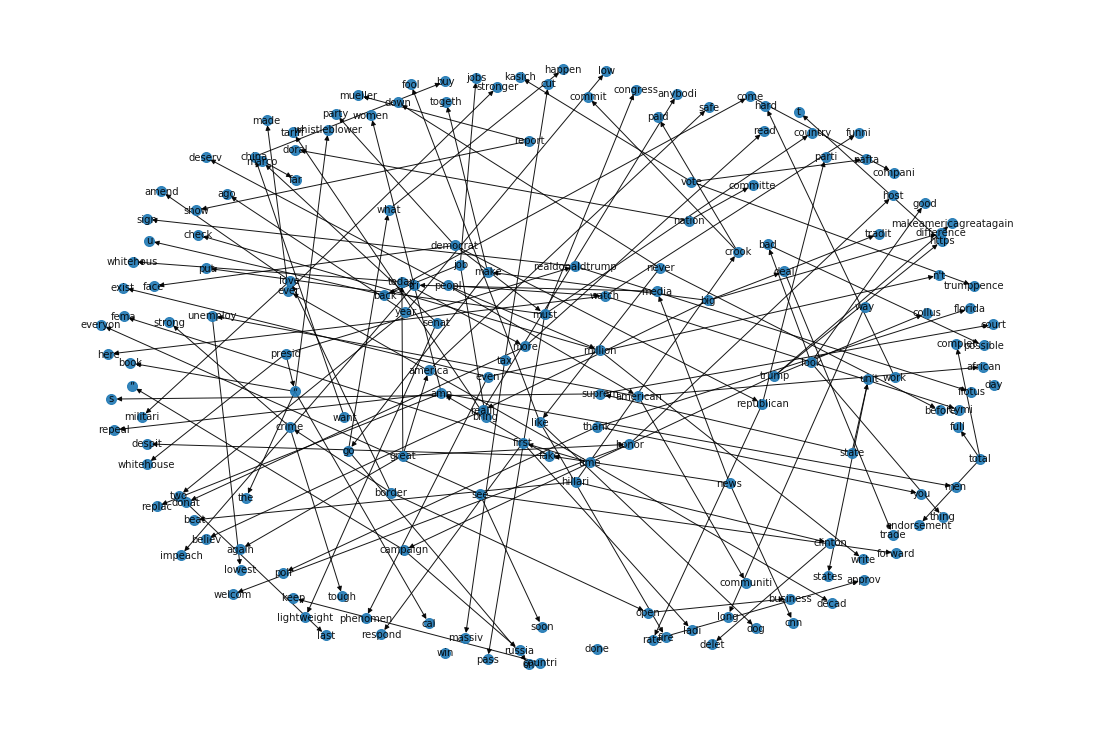

In [15]:
G = nx.DiGraph()

# nodes
G.add_nodes_from(nodelist)

# edges
G.add_edges_from(edgelist)

#layout
# k controls the distance between the nodes and varies between 0 and 1
# iterations is the number of times simulated annealing is run
# default k = 0.1 and iterations = 50
pos = nx.spring_layout(G, k = 0.5, iterations = 50) # positions for all nodes

plt.figure(figsize=(15,10))
nx.draw(G, pos, edges = edges, arrows=True, with_labels=True, font_size=10, node_size = 100, alpha = 0.9)

plt.axis('off')
plt.show() # display

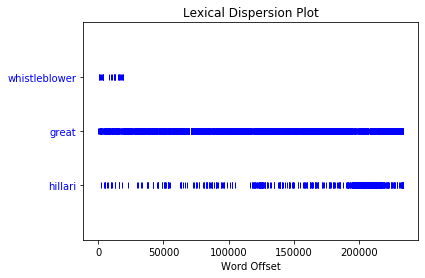

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

texts.dispersion_plot(["whistleblower", "great", "hillari"])

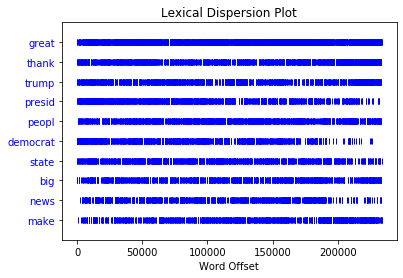

In [17]:
mfw_list = []
for mfw in most_freq_words[:10]:
    mfw_list.append(mfw)

texts.dispersion_plot(mfw_list)

In [18]:
term = 'clinton'
texts.concordance(term)

Displaying 25 of 530 matches:
g win kilmead “ i want know hillari clinton dossier want know fisa abuse we ' r
… https t co yvsghknx crook hillari clinton call respect environmentalist green
 complet intern investig former sec clinton use privat email found violati… gop
mfitton huge hundr secur violat tie clinton emails crime deep state enemi list 
op server email huma abedin hillari clinton delet clinton email go on ” loudobb
l huma abedin hillari clinton delet clinton email go on ” loudobb joe amp victo
sell out crowd target center presid clinton obama paid almost nothing minneapol
want bring home think crook hillari clinton enter race tri steal away uber left
 rise level impeachment ” ken starr clinton special prosecutor “ i do n't ” sle
taxog realdonaldtrump crook hillari clinton delet acid wash email get subpoena 
t volker interview i… crook hillari clinton delet acid wash email get subpoena 
either idea say word lost lied even clinton lover gstephanopoulo strong call ou
ns presid 

In [19]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


In [20]:
#import data
train = pd.read_csv("trump_tweets_all.csv")


In [21]:
train.head()

,source,text,created_at,retweet_count,favorite_count,id_str
0,Twitter Media Studio,The Democrats have been on this path for 3 yea...,10-30-2019 20:42:43,20062,63830,1189643818431406080
1,Twitter for iPhone,Thank you @GLFOP! https://t.co/IpoUY7QPM2,10-30-2019 20:21:54,11113,38294,1189638577866657794
2,Twitter for iPhone,“Adam Schiff’s drive to impeach Trump based on...,10-30-2019 19:54:02,18913,61417,1189631565279760391
3,Twitter for iPhone,We will be having a big rally for Governor @Ma...,10-30-2019 19:49:44,13014,42063,1189630486886395906
4,Twitter for iPhone,Early voting in Louisiana for a man who will b...,10-30-2019 18:44:32,15636,55783,1189614076743376897
